## Data Analysis and Graphical Creation

In [1]:
# Import Dependancies
import pandas as pd
from config import key
import numpy as np
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json

In [2]:
# Load Attendance and Game Data
cubs = "Resources/cubs_complete.csv"

# Read Attendance and Game Data
cubs_df = pd.read_csv(cubs)
cubs_df

,Date,Month,Day,Season,Gm#,Tm,Opp,Win/Loss,Season Wins,Season Losses,...,Day/ Night Game,Attendance,Temperature (F),Feels Like (F),Wind Chill (F),Wind Gust (mph),Humidity (%),Cloud Cover (%),Rain Fall (in),Snow Fall (cm)
0,2015-04-05,April,Sunday,2015,1,CHC,STL,L,0,1,...,Night,35055,55.0,42.0,42.0,24.0,61.0,31.0,0.0,0.0
1,2015-04-08,April,Wednesday,2015,2,CHC,STL,W,1,1,...,Day,26814,42.0,35.0,35.0,18.0,93.0,96.0,0.2,0.0
2,2015-04-13,April,Monday,2015,6,CHC,CIN,W,4,2,...,Night,26390,45.0,37.0,37.0,22.0,80.0,62.0,0.1,0.0
3,2015-04-14,April,Tuesday,2015,7,CHC,CIN,L,4,3,...,Night,27525,47.0,37.0,37.0,22.0,85.0,60.0,0.1,0.0
4,2015-04-15,April,Wednesday,2015,8,CHC,CIN,W,5,3,...,Night,29205,51.0,41.0,41.0,27.0,80.0,57.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2019-09-18,September,Wednesday,2019,152,CHC,CIN,L,82,70,...,Night,36578,79.0,74.0,73.0,15.0,70.0,18.0,0.0,0.0
401,2019-09-19,September,Thursday,2019,153,CHC,STL,L,82,71,...,Night,39524,81.0,77.0,74.0,10.0,65.0,33.0,0.0,0.0
402,2019-09-20,September,Friday,2019,154,CHC,STL,L,82,72,...,Day,39106,82.0,80.0,77.0,7.0,63.0,42.0,0.2,0.0
403,2019-09-21,September,Saturday,2019,155,CHC,STL,L,82,73,...,Day,40071,80.0,79.0,75.0,18.0,77.0,75.0,0.8,0.0


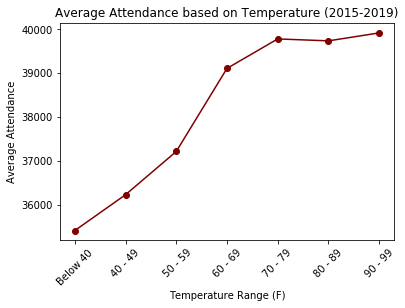

In [3]:
# Average Attendance vs. Temperature
weather_df = cubs_df.copy()

# Creating Bins to Group
weather_df = weather_df[["Season", "Attendance", "Feels Like (F)", "Wind Gust (mph)", "Humidity (%)", "Rain Fall (in)", "Cloud Cover (%)"]]
weather_bins = [0,39.9, 49.9, 59.9, 69.9, 79.9, 89.9, 99.9]
weather_group_names = ["Below 40", "40 - 49", " 50 - 59", "60 - 69", "70 - 79", "80 - 89", "90 - 99"]
weather_df["Temperature Range"] = pd.cut(weather_df["Feels Like (F)"], weather_bins, labels=weather_group_names, include_lowest=True)

# Group Temperatures into Bins
weather_group = weather_df.groupby("Temperature Range")

# Obtain Average Attendance and Clean Up DataFrame
weather_group = weather_group[["Attendance"]].mean()
weather_group.reset_index(inplace=True)

# Graph Data
weather_group.set_index("Temperature Range")["Attendance"].plot(xticks=weather_group.index, marker="o", color="maroon", rot=45)
plt.ylabel("Average Attendance")
plt.xlabel("Temperature Range (F)")
plt.title("Average Attendance based on Temperature (2015-2019)")
plt.show()

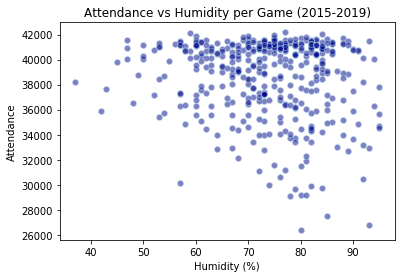

In [4]:
# Humidty vs. Attendance
weather_hum = weather_df.copy()
weather_hum = weather_hum[["Humidity (%)", "Attendance"]]

weather_x_values = weather_hum["Humidity (%)"]
weather_y_values = weather_hum["Attendance"]

plt.scatter(weather_x_values, weather_y_values, marker="o", facecolors="DarkBlue", edgecolors="LightBlue", alpha=0.5)
plt.xlabel("Humidity (%)")
plt.ylabel("Attendance")
plt.title("Attendance vs Humidity per Game (2015-2019)")
plt.show()

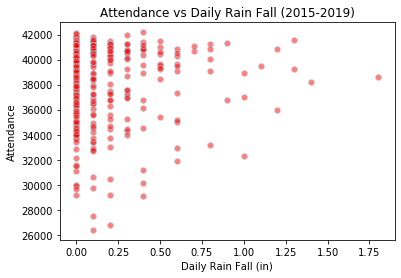

In [5]:
# Daily Rain Fall vs. Attendance
weather_rain = weather_df.copy()
weather_rain = weather_rain[["Rain Fall (in)", "Attendance"]]

weather_x_values = weather_rain["Rain Fall (in)"]
weather_y_values = weather_rain["Attendance"]

plt.scatter(weather_x_values, weather_y_values, marker="o", facecolors="Red", edgecolors="LightBlue", alpha=0.5)
plt.xlabel("Daily Rain Fall (in)")
plt.ylabel("Attendance")
plt.title("Attendance vs Daily Rain Fall (2015-2019)")
plt.show()

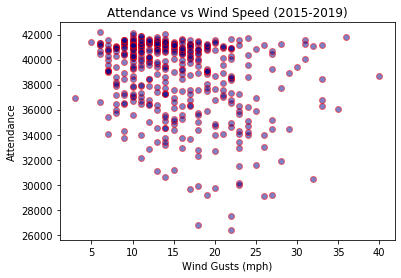

In [6]:
# Wind Gust Speed vs. Attendance
weather_wind = weather_df.copy()
weather_wind = weather_wind[["Wind Gust (mph)", "Attendance"]]

weather_x_values = weather_wind["Wind Gust (mph)"]
weather_y_values = weather_wind["Attendance"]

plt.scatter(weather_x_values, weather_y_values, marker="o", facecolors="DarkBlue", edgecolors="Red", alpha=0.5)
plt.xlabel("Wind Gusts (mph)")
plt.ylabel("Attendance")
plt.title("Attendance vs Wind Speed (2015-2019)")
plt.show()

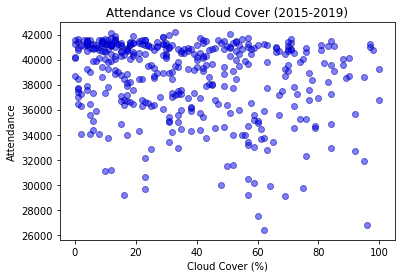

In [7]:
# Cloud Cover vs. Attendance
weather_cloud = weather_df.copy()
weather_cloud = weather_cloud[["Cloud Cover (%)", "Attendance"]]

weather_x_values = weather_cloud["Cloud Cover (%)"]
weather_y_values = weather_cloud["Attendance"]

plt.scatter(weather_x_values, weather_y_values, marker="o", facecolors="Blue", edgecolor="DarkBlue", alpha=0.5)
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Attendance")
plt.title("Attendance vs Cloud Cover (2015-2019)")
plt.show()

In [8]:
# (1) Working Weather Cell - Scott (Create All DataFrames and Variables with "weather_" prefix)

In [9]:
# (2) Working Performance Cell - Calvin (Create All DataFrames and Variables with "perf_" prefix)
perf_df = cubs_df.copy()

In [10]:
# (2) Working Performance Cell - Calvin (Create All DataFrames and Variables with "perf_" prefix)

In [11]:
# (2) Working Performance Cell - Calvin (Create All DataFrames and Variables with "perf_" prefix)

In [12]:
# (2) Working Performance Cell - Calvin (Create All DataFrames and Variables with "perf_" prefix)

In [13]:
# (2) Working Performance Cell - Calvin (Create All DataFrames and Variables with "perf_" prefix)

In [14]:
# (2) Working Performance Cell - Calvin (Create All DataFrames and Variables with "perf_" prefix)

In [15]:
# (2) Working Performance Cell - Calvin (Create All DataFrames and Variables with "perf_" prefix)

In [16]:
# (3) Working Visiting Team Cell - Sam (Create All DataFrames and Variables with "visit_" prefix)
visit_df = cubs_df.copy()

In [17]:
# (3) Working Visiting Team Cell - Sam (Create All DataFrames and Variables with "visit_" prefix)

In [18]:
# (3) Working Visiting Team Cell - Sam (Create All DataFrames and Variables with "visit_" prefix)

In [19]:
# (3) Working Visiting Team Cell - Sam (Create All DataFrames and Variables with "visit_" prefix)

In [20]:
# (3) Working Visiting Team Cell - Sam (Create All DataFrames and Variables with "visit_" prefix)

In [21]:
# (3) Working Visiting Team Cell - Sam (Create All DataFrames and Variables with "visit_" prefix)

In [22]:
# (4) Working Date Cell - Tiffany (Create All DataFrames and Variables with "date_" prefix)
date_df = cubs_df.copy()

In [23]:
# (4) Working Date Cell - Tiffany (Create All DataFrames and Variables with "date_" prefix)

In [24]:
# (4) Working Date Cell - Tiffany (Create All DataFrames and Variables with "date_" prefix)

In [25]:
# (4) Working Date Cell - Tiffany (Create All DataFrames and Variables with "date_" prefix)

In [26]:
# (4) Working Date Cell - Tiffany (Create All DataFrames and Variables with "date_" prefix)

In [27]:
# (4) Working Date Cell - Tiffany (Create All DataFrames and Variables with "date_" prefix)